In [264]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer, InterclusterDistance
from sklearn.datasets import make_blobs
from sklearn.metrics import davies_bouldin_score
from sklearn import cluster
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.cluster import KMeans
import missingno as msno
import os
from pathlib import Path 
import matplotlib.pyplot as plt 
import time
import scipy.cluster.hierarchy as shc
import seaborn as sns
from sklearn.decomposition import PCA
from fanalysis.pca import PCA
import scipy.stats as stats
import math
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.colors import ListedColormap

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import numpy as np

In [45]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

In [46]:
Km_data = pd.read_csv(r'C:\Users\Maxime.ALTER\ProjetFinal\data\kmean_Data.csv')\
.set_index("customer_unique_id")

In [47]:
clean_dataset(Km_data)

,total_spend,review_id,mean_review,total_nb_sellers,erreur_estimation_livraison,temps_commande_livraison,buy_freq
customer_unique_id,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,129.90,1.0,5.0,1.0,99.189722,153.869444,0.0
0000b849f77a49e4a4ce2b2a4ca5be3f,18.90,1.0,4.0,1.0,101.955000,78.854167,0.0
0000f46a3911fa3c0805444483337064,69.00,1.0,3.0,1.0,33.353611,617.562222,0.0
0000f6ccb0745a6a4b88665a16c9f078,25.99,1.0,4.0,1.0,266.615278,480.890000,0.0
0004aac84e0df4da2b147fca70cf8255,180.00,1.0,5.0,1.0,168.851111,315.387222,0.0
...,...,...,...,...,...,...,...
fffcf5a5ff07b0908bd4e2dbc735a684,1570.00,1.0,5.0,1.0,638.633333,660.356667,0.0
fffea47cd6d3cc0a88bd621562a9d061,64.89,1.0,4.0,1.0,49.527778,722.340000,0.0
ffff371b4d645b6ecea244b27531430a,89.90,1.0,5.0,1.0,707.248889,356.930000,0.0


In [48]:
Km_data_sc = preprocessing.scale(Km_data)
res = cluster.KMeans(n_clusters=4)
res.fit(Km_data_sc)

KMeans(n_clusters=4)

In [49]:
res.predict(Km_data_sc)
res.labels_
np.unique(res.labels_, return_counts=True)

(array([0, 1, 2, 3]), array([14591, 70423,  2162,  5577], dtype=int64))

In [50]:
# Rajouter la variable au data-frame initial
Km_data_c = Km_data.copy()
Km_data_c['labels'] = res.labels_
# Configuration des points dans le plan
# Des variables prises par paires
sns.pairplot(Km_data_c,hue="labels")


KeyboardInterrupt



Error in callback <function flush_figures at 0x0000021F6DDACC10> (for post_execute):


KeyboardInterrupt: 

In [ ]:
# Moyennes par groupe
gb_km = Km_data.groupby(res.labels_)
# Éffectifs par classe
gb_km.size()

In [ ]:
n_f = list(Km_data.select_dtypes(include=['int64', 'float64']).columns)
numerical_features = n_f
numerical_features

In [ ]:
scaler = MinMaxScaler()
# scaler = StandardScaler()
preprocessor = ColumnTransformer([
    ('scaler', scaler, numerical_features)])

In [ ]:
# Elbow method
kmeans_visualizer = Pipeline([
    ("preprocessor", preprocessor), 
    ("kelbowvisualizer", KElbowVisualizer(KMeans(), K=(4, 12)))])
kmeans_visualizer.fit(Km_data)
kmeans_visualizer.named_steps['kelbowvisualizer'].show()

In [ ]:
# Best K in Elbow
K = kmeans_visualizer.named_steps['kelbowvisualizer'].elbow_value_

# Silhouette Visualizer
silhouette_visualizer = Pipeline([
    ("preprocessor", preprocessor),
    ("silhouettevisualizer", SilhouetteVisualizer(KMeans(K)))])
silhouette_visualizer.fit(Km_data)
silhouette_visualizer.named_steps['silhouettevisualizer'].show()

In [ ]:
davies_bouldin_score(Km_data, res.labels_)

# CSS 3 :

In [ ]:
path = Path(os.getcwd()) 
p_parent = path.parent
css3 = str(p_parent) + '\data\css3.csv'

In [ ]:
css3 = pd.read_csv(css3)\
.set_index("customer_unique_id")

In [ ]:
css3.head()

In [ ]:
msno.matrix(css3, figsize=(32,16))

In [ ]:
clean_dataset(css3)

In [ ]:
data = preprocessing.scale(css3)
res = cluster.KMeans(n_clusters=4)
res.fit(data)

In [ ]:
res.predict(data)
res.labels_
np.unique(res.labels_, return_counts=True)

In [ ]:
# Rajouter la variable au data-frame initial
data_c = css3.copy()
data_c['labels'] = res.labels_
# Configuration des points dans le plan
# Des variables prises par paires
sns.pairplot(data_c,hue="labels")

In [ ]:
# Moyennes par groupe
gb_km = css3.groupby(res.labels_)
# Éffectifs par classe
gb_km.size()

In [ ]:
n_f = list(css3.select_dtypes(include=['int64', 'float64']).columns)
numerical_features = n_f
numerical_features

In [ ]:
scaler = MinMaxScaler()
# scaler = StandardScaler()
preprocessor = ColumnTransformer([
    ('scaler', scaler, numerical_features)])

In [ ]:
# Elbow method
kmeans_visualizer = Pipeline([
    ("preprocessor", preprocessor), 
    ("kelbowvisualizer", KElbowVisualizer(KMeans(), K=(4, 12)))])
kmeans_visualizer.fit(css3)
kmeans_visualizer.named_steps['kelbowvisualizer'].show()

In [ ]:
# Best K in Elbow
K = kmeans_visualizer.named_steps['kelbowvisualizer'].elbow_value_

# Silhouette Visualizer
silhouette_visualizer = Pipeline([
    ("preprocessor", preprocessor),
    ("silhouettevisualizer", SilhouetteVisualizer(KMeans(K)))])
silhouette_visualizer.fit(css3)
silhouette_visualizer.named_steps['silhouettevisualizer'].show()

In [ ]:
davies_bouldin_score(css3, res.labels_)

In [ ]:
group = 1 # group you want to select
group_indices = (res.labels_ == group)
group_data = data[group_indices]

In [ ]:
custom_label = css3.columns
custom_label = custom_label.drop(['labels'])
print(custom_label)

In [ ]:
group_data = pd.DataFrame(group_data, columns=custom_label)

In [ ]:
print(group_data)

# CSS 5 kmean

In [56]:
path = Path(os.getcwd()) 
p_parent = path.parent
css5 = str(p_parent) + '\data\css5.csv'

css5 = pd.read_csv(css5)\
.set_index("customer_unique_id")

clean_dataset(css5)

,nb_order,nb_review,mean_review,total_nb_product,total_nb_sellers,temps_approbation,erreur_estimation_livraison,temps_commande_livraison,temps_livraison_review,buy_freq,...,Home_supply,Other,Sport_supply,Tools,boleto,credit_card,debit_card,not_defined,voucher,avg_bask_price
customer_unique_id,,,,,,,,,,,,,,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,1.0,1.0,5.0,1.0,1.0,0.247500,99.189722,153.869444,3.189722,0.0,...,18.12,0.00,0.0,0.0,0.0,1.0,0.0,0.0,0.0,141.90
0000b849f77a49e4a4ce2b2a4ca5be3f,1.0,1.0,4.0,1.0,1.0,7.238056,101.955000,78.854167,5.955000,0.0,...,0.00,0.00,0.0,0.0,0.0,1.0,0.0,0.0,0.0,27.19
0000f46a3911fa3c0805444483337064,1.0,1.0,3.0,1.0,1.0,0.000000,33.353611,617.562222,9.353611,0.0,...,18.59,0.00,0.0,0.0,0.0,1.0,0.0,0.0,0.0,86.22
0000f6ccb0745a6a4b88665a16c9f078,1.0,1.0,4.0,1.0,1.0,0.326667,266.615278,480.890000,2.615278,0.0,...,0.00,0.00,0.0,0.0,0.0,1.0,0.0,0.0,0.0,43.62
0004aac84e0df4da2b147fca70cf8255,1.0,1.0,5.0,1.0,1.0,0.352778,168.851111,315.387222,0.851111,0.0,...,0.00,0.00,0.0,0.0,0.0,1.0,0.0,0.0,0.0,196.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fffcf5a5ff07b0908bd4e2dbc735a684,1.0,1.0,5.0,2.0,1.0,0.244444,638.633333,660.356667,14.633333,0.0,...,0.00,0.00,0.0,0.0,0.0,2.0,0.0,0.0,0.0,4134.84
fffea47cd6d3cc0a88bd621562a9d061,1.0,1.0,4.0,1.0,1.0,0.140000,49.527778,722.340000,1.527778,0.0,...,0.00,0.00,0.0,0.0,0.0,1.0,0.0,0.0,0.0,84.58
ffff371b4d645b6ecea244b27531430a,1.0,1.0,5.0,1.0,1.0,0.224444,707.248889,356.930000,11.248889,0.0,...,0.00,441.16,0.0,0.0,0.0,1.0,0.0,0.0,0.0,112.46


In [54]:
#data = preprocessing.scale(css5)
#res = cluster.KMeans(n_clusters=4)
#res.fit(data)

KMeans(n_clusters=4)

In [ ]:
#res.predict(data)
#res.labels_
#np.unique(res.labels_, return_counts=True)

In [57]:
n_f = list(css5.select_dtypes(include=['int64', 'float64']).columns)
numerical_features = n_f
numerical_features

['nb_order',
 'nb_review',
 'mean_review',
 'total_nb_product',
 'total_nb_sellers',
 'temps_approbation',
 'erreur_estimation_livraison',
 'temps_commande_livraison',
 'temps_livraison_review',
 'buy_freq',
 'delivery_distance',
 'ratio_transport_cost',
 'transport_cost_per_km',
 'Art',
 'Books',
 'Fashion',
 'Food_and_Drinks',
 'Health_and_beauty',
 'High_tech',
 'Home_supply',
 'Other',
 'Sport_supply',
 'Tools',
 'boleto',
 'credit_card',
 'debit_card',
 'not_defined',
 'voucher',
 'avg_bask_price']

In [58]:
scaler = MinMaxScaler()
#scaler = StandardScaler()
preprocessor = ColumnTransformer([
    ('scaler', scaler, numerical_features)])

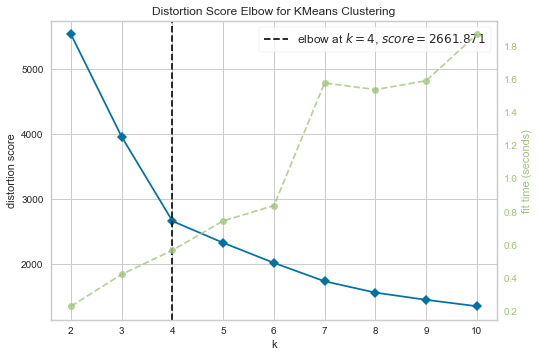

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [65]:
# Elbow method
kmeans_visualizer = Pipeline([
    ("preprocessor", preprocessor), 
    ("kelbowvisualizer", KElbowVisualizer(KMeans(), K=(4, 12)))])
model = kmeans_visualizer.fit(css5)
model.named_steps['kelbowvisualizer'].show()

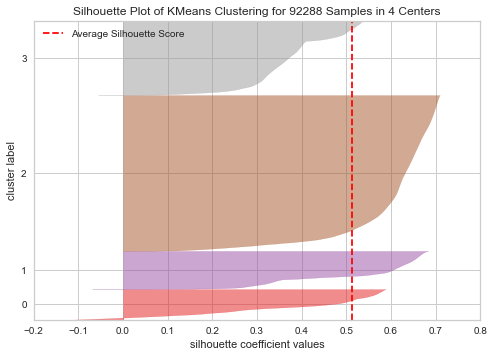

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 92288 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [60]:
# Best K in Elbow
K = kmeans_visualizer.named_steps['kelbowvisualizer'].elbow_value_
# Silhouette Visualizer
silhouette_visualizer = Pipeline([
    ("preprocessor", preprocessor),
    ("silhouettevisualizer", SilhouetteVisualizer(KMeans(K)))])
silhouette_visualizer.fit(css5)
silhouette_visualizer.named_steps['silhouettevisualizer'].show()

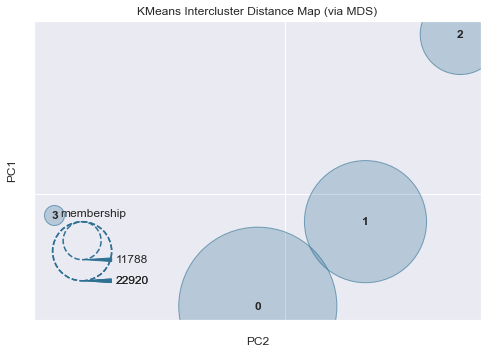

<AxesSubplot:title={'center':'KMeans Intercluster Distance Map (via MDS)'}, xlabel='PC2', ylabel='PC1'>

In [224]:
# Instantiate the clustering model and visualizer
visualizer = InterclusterDistance(KMeans(K))

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [62]:
davies_bouldin_score(css5, res.labels_)

11.797894067398385

# CSS 5 ACP + kmean

### ACP

In [327]:
path = Path(os.getcwd()) 
p_parent = path.parent
css5 = str(p_parent) + '\data\css5.csv'

css5 = pd.read_csv(css5)\
.set_index("customer_unique_id")

#drop_col = ['nb_review','total_nb_product','total_nb_sellers']

#css5 = css5.drop(drop_col, axis = 1)

clean_dataset(css5)

,nb_order,nb_review,mean_review,total_nb_product,total_nb_sellers,temps_approbation,erreur_estimation_livraison,temps_commande_livraison,temps_livraison_review,buy_freq,...,Home_supply,Other,Sport_supply,Tools,boleto,credit_card,debit_card,not_defined,voucher,avg_bask_price
customer_unique_id,,,,,,,,,,,,,,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,1.0,1.0,5.0,1.0,1.0,0.247500,99.189722,153.869444,3.189722,0.0,...,141.90,0.00,0.0,0.0,0.0,141.90,0.0,0.0,0.0,141.90
0000b849f77a49e4a4ce2b2a4ca5be3f,1.0,1.0,4.0,1.0,1.0,7.238056,101.955000,78.854167,5.955000,0.0,...,0.00,0.00,0.0,0.0,0.0,27.19,0.0,0.0,0.0,27.19
0000f46a3911fa3c0805444483337064,1.0,1.0,3.0,1.0,1.0,0.000000,33.353611,617.562222,9.353611,0.0,...,86.22,0.00,0.0,0.0,0.0,86.22,0.0,0.0,0.0,86.22
0000f6ccb0745a6a4b88665a16c9f078,1.0,1.0,4.0,1.0,1.0,0.326667,266.615278,480.890000,2.615278,0.0,...,0.00,0.00,0.0,0.0,0.0,43.62,0.0,0.0,0.0,43.62
0004aac84e0df4da2b147fca70cf8255,1.0,1.0,5.0,1.0,1.0,0.352778,168.851111,315.387222,0.851111,0.0,...,0.00,0.00,0.0,0.0,0.0,196.89,0.0,0.0,0.0,196.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fffcf5a5ff07b0908bd4e2dbc735a684,1.0,1.0,5.0,2.0,1.0,0.244444,638.633333,660.356667,14.633333,0.0,...,0.00,0.00,0.0,0.0,0.0,8269.68,0.0,0.0,0.0,4134.84
fffea47cd6d3cc0a88bd621562a9d061,1.0,1.0,4.0,1.0,1.0,0.140000,49.527778,722.340000,1.527778,0.0,...,0.00,0.00,0.0,0.0,0.0,84.58,0.0,0.0,0.0,84.58
ffff371b4d645b6ecea244b27531430a,1.0,1.0,5.0,1.0,1.0,0.224444,707.248889,356.930000,11.248889,0.0,...,0.00,112.46,0.0,0.0,0.0,112.46,0.0,0.0,0.0,112.46


In [328]:
scaler = MinMaxScaler()
#scaler = StandardScaler()
segmentation_std = scaler.fit_transform(css5)

In [329]:
#nombre de variables
p = css5.shape[1]
#nombre d'observations
n = css5.shape[0]
#matrice des X
X = segmentation_std

#instancier l'objet de calcul
#std_unit = True ➔ ACP normée
acp = PCA(std_unit=True,row_labels=css5.index,col_labels=css5.columns)
#lancer les calculs sur les données
acp.fit(X)

C:\ProgramData\Anaconda3\lib\site-packages\fanalysis\pca.py:228: RuntimeWarning: invalid value encountered in true_divide
  Z = (X - self.means_) / self.std_


LinAlgError: SVD did not converge

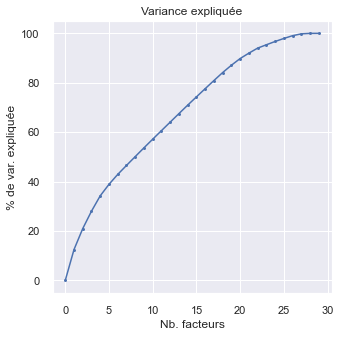

In [228]:
#proportion de variance expliquée
fig, ax = plt.subplots(figsize=(5,5))
ax.plot(range(0,p+1),np.append(0,acp.eig_[2]),".-")
ax.set_xlabel("Nb. facteurs")
ax.set_ylabel("% de var. expliquée")
plt.title("Variance expliquée")
plt.show()

In [293]:
#on décide de garder 80% de la variance, donc 15 facteurs
n_components = 4
acp = PCA(n_components = n_components, row_labels=css5.index,col_labels=css5.columns)
acp.fit(X)
# créer la variable pca_components pour le Kmean
pca_components = acp.transform(X)

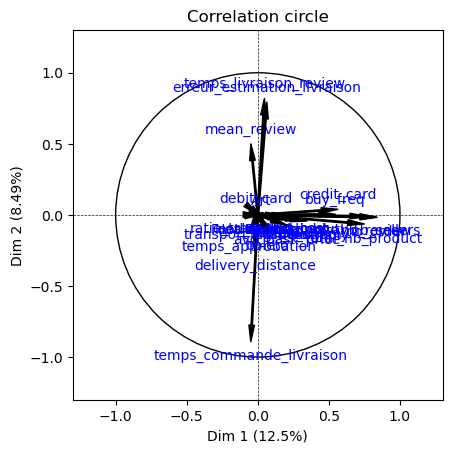

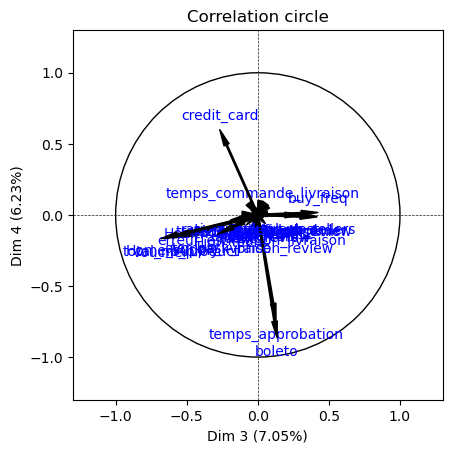

In [294]:
#cercle des corrélations

t1 = acp.correlation_circle(num_x_axis=1,num_y_axis=2)
t2 = acp.correlation_circle(num_x_axis=3,num_y_axis=4)


plt.show()

In [295]:
#contributions des variables sur les 2 premiers facteurs (en %)
print(pd.DataFrame(acp.col_contrib_[:,:n_components],index=css5.columns))

                                     0          1          2          3
nb_order                     19.399350   0.011693   8.424988   0.006238
nb_review                    19.186789   0.008602   8.403925   0.012158
mean_review                   0.066394  10.150104   0.135366   0.198772
total_nb_product             15.494341   0.166307  14.115594   1.376170
total_nb_sellers             16.145889   0.003856   4.631229   0.000040
temps_approbation             0.101609   0.612590   0.802447  30.293671
erreur_estimation_livraison   0.111930  25.559883   0.086094   0.382022
temps_commande_livraison      0.068213  32.356466   0.056062   0.138596
temps_livraison_review        0.059097  27.295332   0.055991   1.100590
buy_freq                      8.231031   0.000645   8.726867   0.016652
delivery_distance             0.011787   2.760444   0.000513   0.014457
ratio_transport_cost          0.005421   0.000006   0.116731   0.001829
transport_cost_per_km         0.032107   0.053803   0.015768   0

### Kmean

In [296]:
# Choose the number of clusters using the elbow method

#kmeans_visualizer = Pipeline([
#("preprocessor", preprocessor), 
#("kelbowvisualizer", KElbowVisualizer(KMeans(), K=(4, 12)))])
#kmeans_visualizer.fit(pca_components)
#kmeans_visualizer.named_steps['kelbowvisualizer'].show()
## Best K in Elbow
#n_clusters = kmeans_visualizer.named_steps['kelbowvisualizer'].elbow_value_

In [297]:
wcss = []
for i in range(2,12):
    kmeans_pca = KMeans(n_clusters = i, init = 'k-means++', random_state=42)
    kmeans_pca.fit(pca_components)
    wcss.append(kmeans_pca.inertia_)

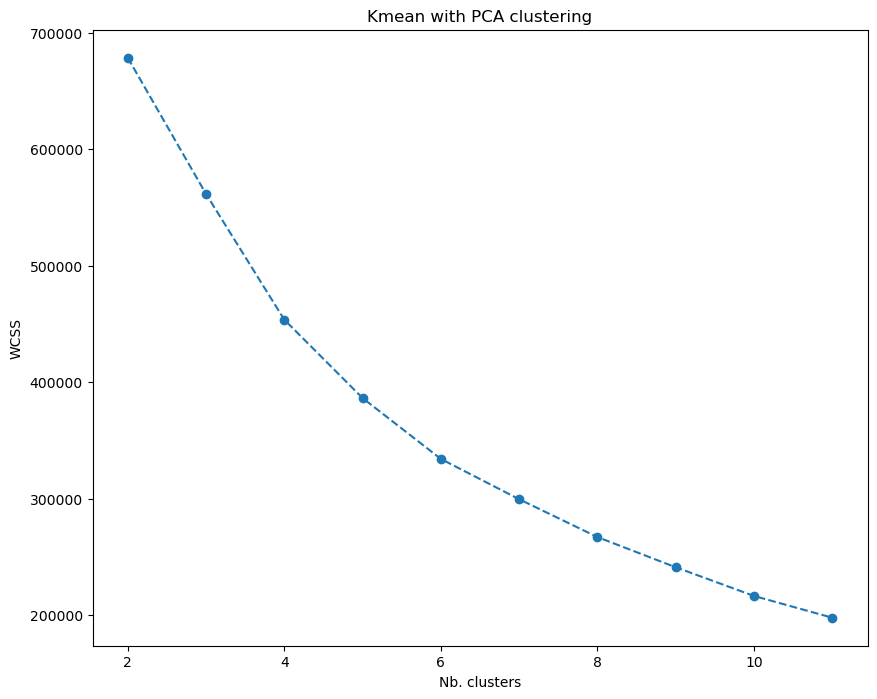

In [298]:
fig, ax = plt.subplots(figsize=(10,8))
ax.plot(range(2,12),wcss, marker = 'o', linestyle ='--')
ax.set_xlabel("Nb. clusters")
ax.set_ylabel("WCSS")
plt.title("Kmean with PCA clustering")
plt.show()

In [299]:
# Perform K-Means clustering
n_clusters = 4
kmean_pca = KMeans(n_clusters = n_clusters, init = 'k-means++', random_state=42)
kmean_pca.fit(pca_components)

KMeans(n_clusters=4, random_state=42)

In [300]:
col_name = []
for i in range(1,n_components+1):
    name = "Componant " + str(i)
    col_name.append(name)
col_name

['Componant 1', 'Componant 2', 'Componant 3', 'Componant 4']

In [301]:
df_segm_pca_kmeans = pd.concat([css5.reset_index(drop = True), pd.DataFrame(pca_components)], axis = 1)
df_segm_pca_kmeans.columns.values[-n_components:] = col_name
df_segm_pca_kmeans['Segment K-means PCA'] = kmeans_pca.labels_

In [302]:
df_segm_pca_kmeans['Segment'] = df_segm_pca_kmeans['Segment K-means PCA'].map({0:'first',
                                                                             1:'second',
                                                                             2:'third',
                                                                             3: 'fourth'
                                                                             })

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


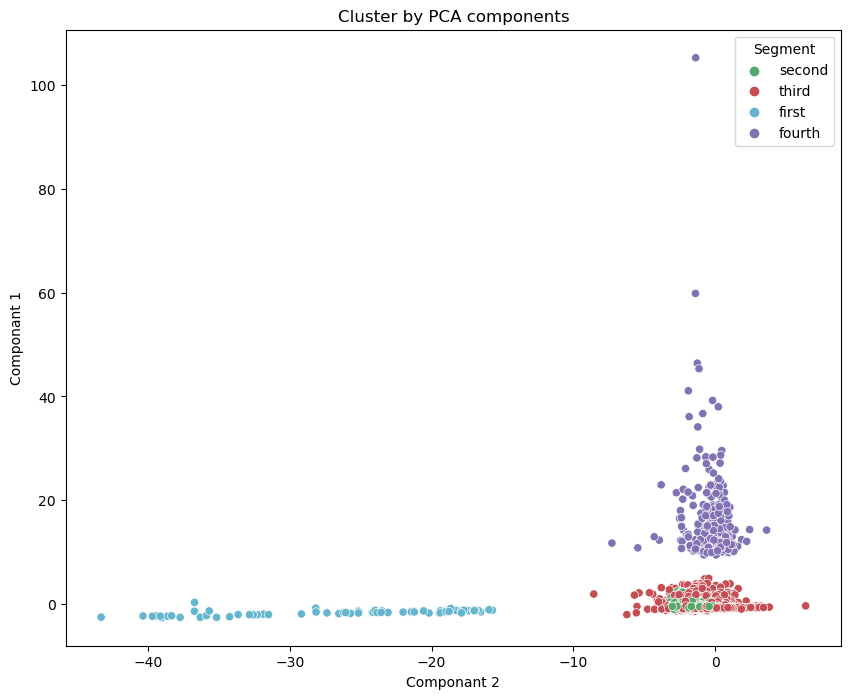

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


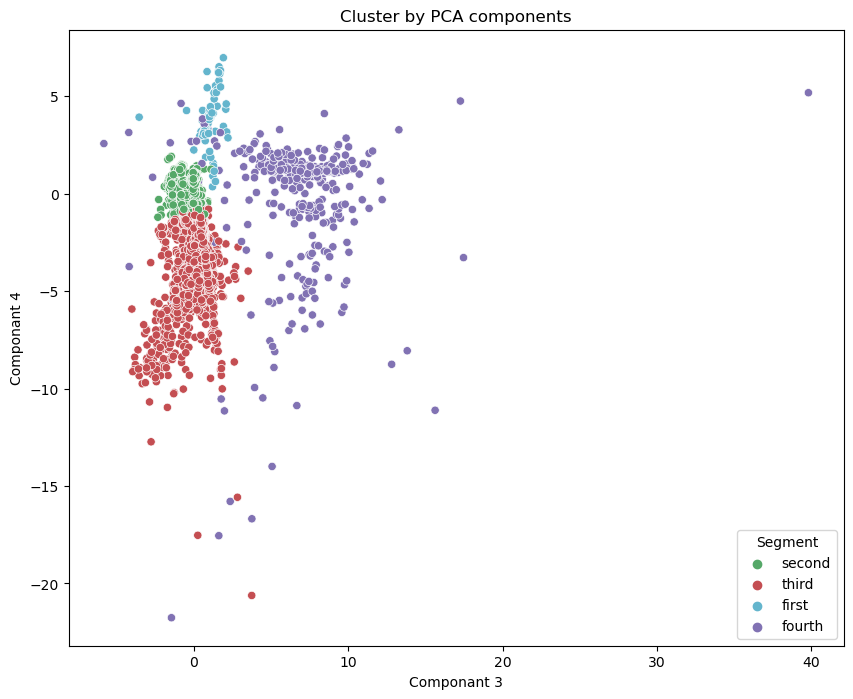

In [316]:
x_axis = df_segm_pca_kmeans['Componant 2']
y_axis = df_segm_pca_kmeans['Componant 1']
z_axis = df_segm_pca_kmeans['Componant 3']
w_axis = df_segm_pca_kmeans['Componant 4']


plt.style.use('default')
plt.figure(figsize =(10,8))
sns.scatterplot(x_axis, y_axis, hue = df_segm_pca_kmeans['Segment'], palette = ['g', 'r', 'c','m'])
plt.title('Cluster by PCA components')
plt.show()

plt.figure(figsize =(10,8))
sns.scatterplot(z_axis, w_axis, hue = df_segm_pca_kmeans['Segment'], palette = ['g', 'r', 'c','m'])
plt.title('Cluster by PCA components')
plt.show()

In [325]:
df_segm_pca_kmeans.head(100)

,nb_order,nb_review,mean_review,total_nb_product,total_nb_sellers,temps_approbation,erreur_estimation_livraison,temps_commande_livraison,temps_livraison_review,buy_freq,...,debit_card,not_defined,voucher,avg_bask_price,Componant 1,Componant 2,Componant 3,Componant 4,Segment K-means PCA,Segment
0,1,1,5.0,1,1,0.247500,99.189722,153.869444,3.189722,0.0,...,0.0,0.0,0.0,141.90,-0.423095,0.504833,0.007787,0.661797,10,NaN
1,1,1,4.0,1,1,7.238056,101.955000,78.854167,5.955000,0.0,...,0.0,0.0,0.0,27.19,-0.423900,0.470486,0.039831,0.514649,10,NaN
2,1,1,3.0,1,1,0.000000,33.353611,617.562222,9.353611,0.0,...,0.0,0.0,0.0,86.22,-0.459228,-1.373694,0.019171,0.824976,1,second
3,1,1,4.0,1,1,0.326667,266.615278,480.890000,2.615278,0.0,...,0.0,0.0,0.0,43.62,-0.449338,-0.890164,-0.019097,0.653066,1,second
4,1,1,5.0,1,1,0.352778,168.851111,315.387222,0.851111,0.0,...,0.0,0.0,0.0,196.89,-0.399433,0.212030,-0.035689,0.641611,10,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1,1,4.0,1,1,0.230833,237.678333,133.626944,-2.321667,0.0,...,0.0,0.0,0.0,542.66,-0.305597,0.462970,-0.202797,0.580935,10,NaN
96,1,1,5.0,1,1,0.000000,445.188611,91.906667,13.188611,0.0,...,0.0,0.0,0.0,137.26,-0.367080,1.270746,-0.048782,0.547557,10,NaN
97,1,1,4.0,2,1,1.175000,341.625000,45.377222,5.625000,0.0,...,0.0,0.0,0.0,127.48,0.535987,1.040565,-0.808030,1.025704,7,NaN
98,1,1,5.0,1,1,0.901667,294.139444,127.239722,6.139444,0.0,...,0.0,0.0,0.0,77.59,-0.408158,0.828645,-0.013342,0.580968,10,NaN


For n_clusters = 2 The average silhouette_score is : 0.7660036021379631
For n_clusters = 3 The average silhouette_score is : 0.5054632723495904
For n_clusters = 4 The average silhouette_score is : 0.5341012484256848
For n_clusters = 5 The average silhouette_score is : 0.5369914834321048
For n_clusters = 6 The average silhouette_score is : 0.5380107133783246


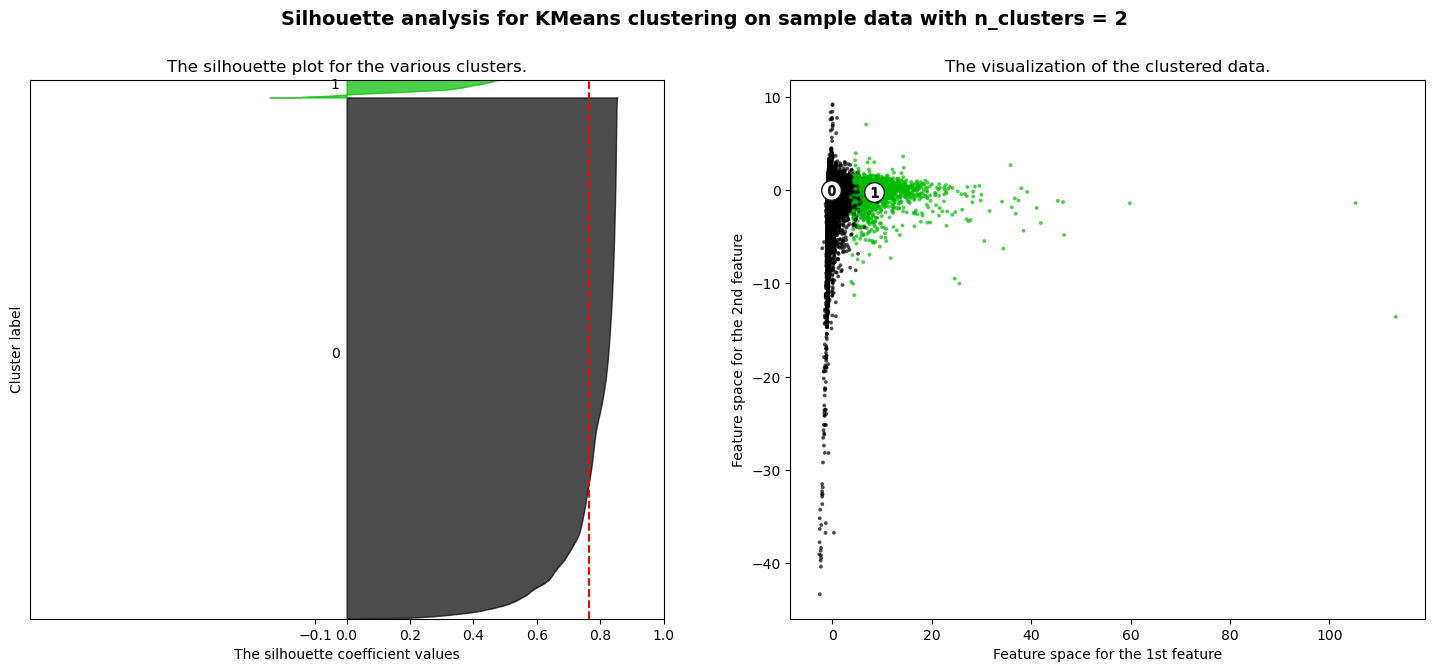

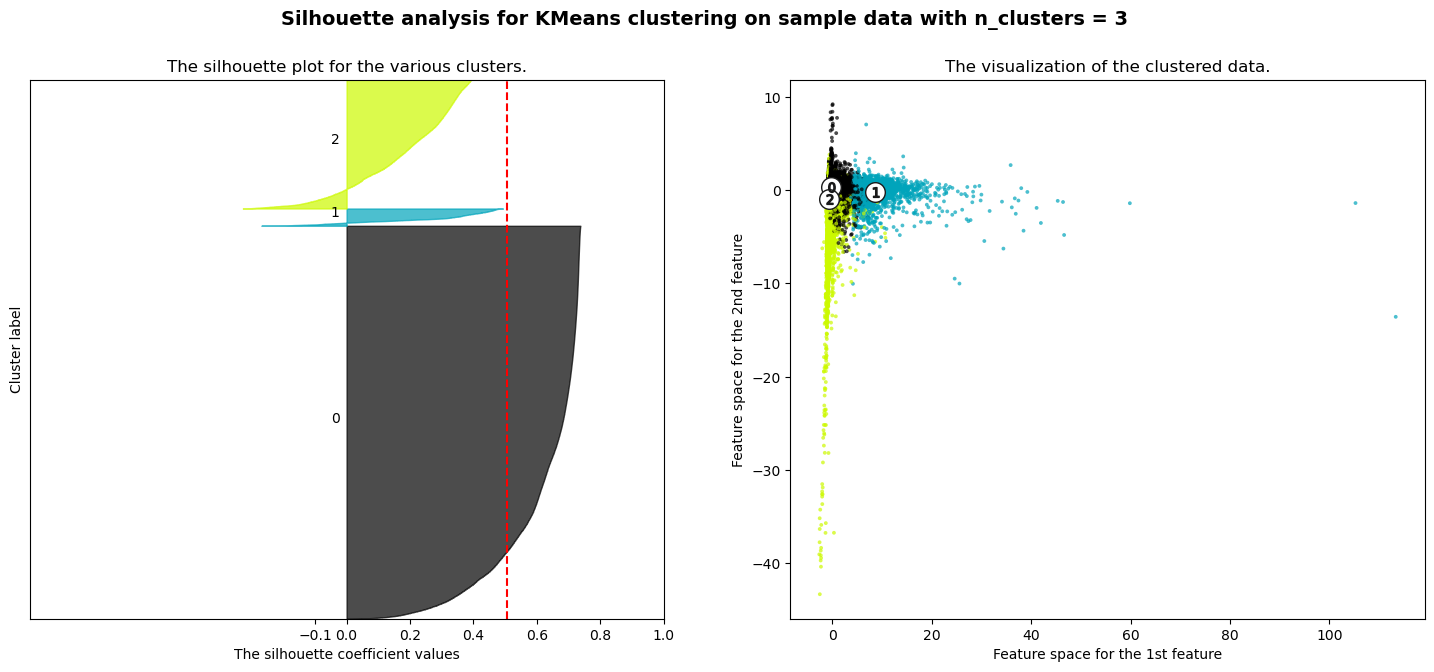

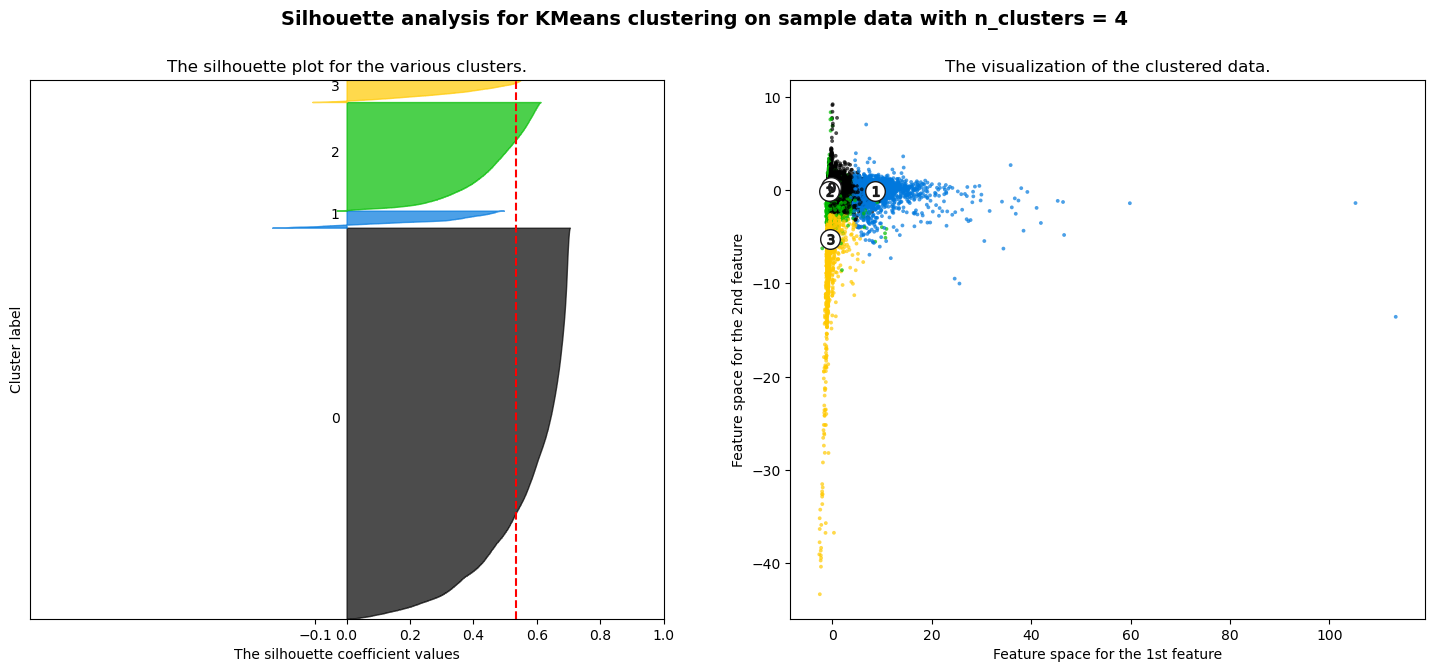

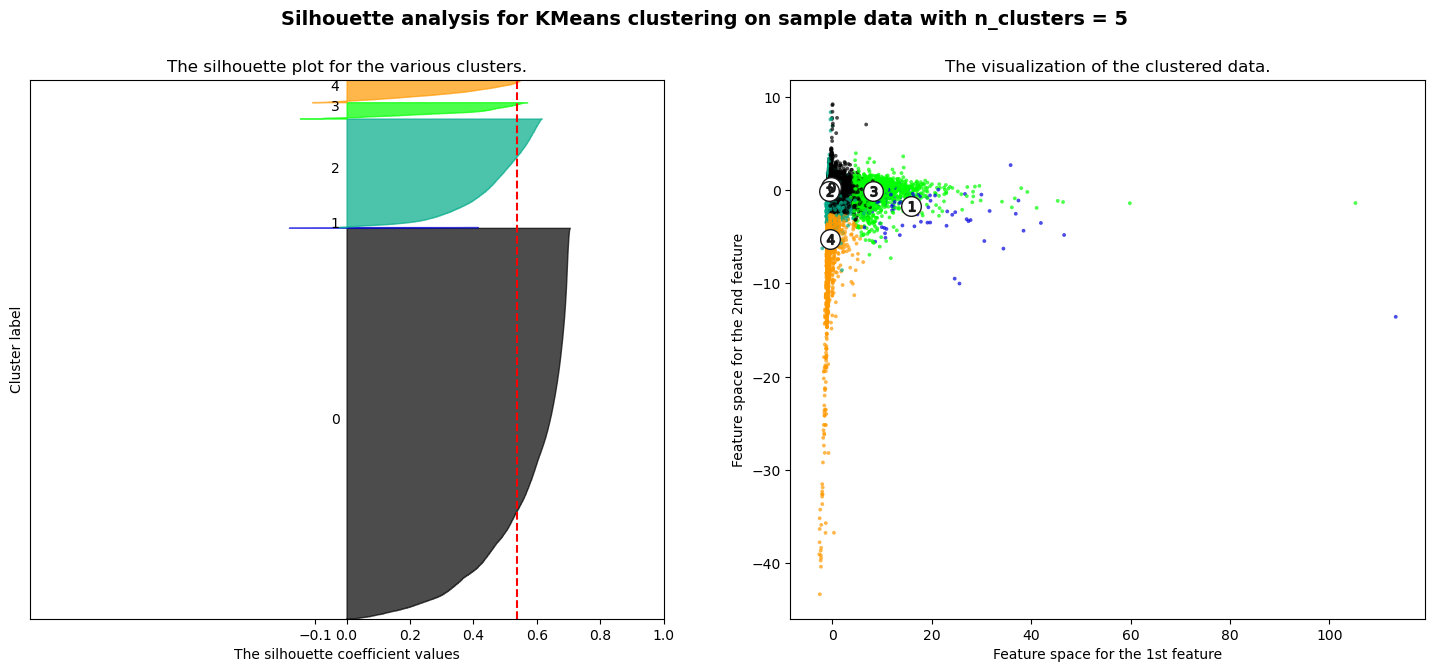

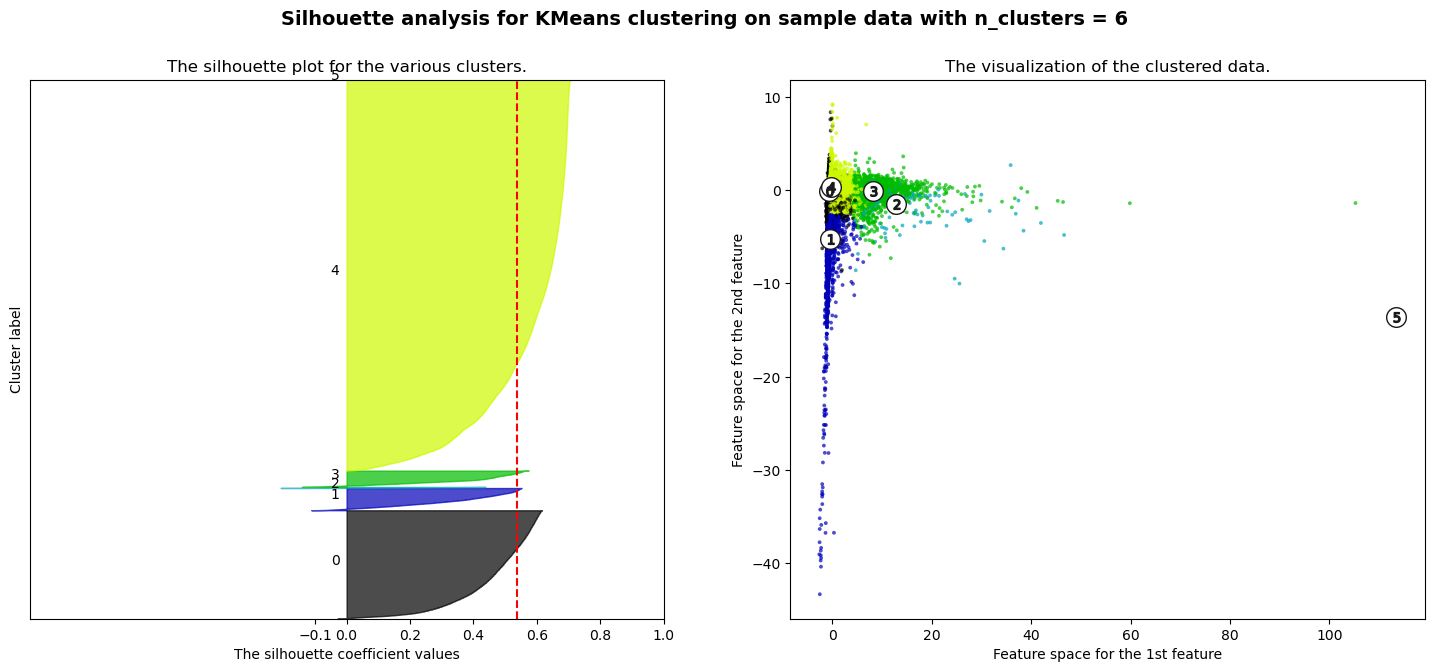

In [320]:
X = pca_components

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters = n_clusters, init = 'k-means++', random_state=42)
    #kmean_pca.fit_predict(pca_components)
    cluster_labels = clusterer.fit_predict(pca_components)
    #clusterer = KMeans(n_clusters=n_clusters, n_init="auto", random_state=10)
    #cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )
    
    
#    # 3nd Plot showing the actual clusters formed
#    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
#    ax3.scatter(
#        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
#    )
#
#    # Labeling the clusters
#    centers = clusterer.cluster_centers_
#    # Draw white circles at cluster centers
#    ax3.scatter(
#        centers[:, 0],
#        centers[:, 1],
#        marker="o",
#        c="white",
#        alpha=1,
#        s=200,
#        edgecolor="k",
#    )
#
#    for i, c in enumerate(centers):
#        ax2.scatter(c[2], c[3], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")
#
#    ax3.set_title("The visualization of the clustered data.")
#    ax3.set_xlabel("Feature space for the 1st feature")
#    ax3.set_ylabel("Feature space for the 2nd feature")
#
#    plt.suptitle(
#        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
#        % n_clusters,
#        fontsize=14,
#        fontweight="bold",
#    )
#

plt.show()